In [1]:
#this notebook loads the contig numbers associated with each cluster made through
# tSNE and HDBscan for a given set of experiments. 
# then makes a single fasta file - which is useful for running through Checkm (done on Sherlock)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import matplotlib.patches as patches
import time
from collections import Counter
import sklearn.cluster as cluster
import time
import hdbscan
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import re
from os import listdir
from os.path import isfile, join

import HTSeq
from Bio import SeqIO

font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2) 
sns.set(font_scale = 2)

In [8]:
alt = pd.read_pickle('ObsCom_alt')
alt5 = pd.read_pickle('ObsCom_alt5')
alt5['length'].sum()/1e6


300.907778

In [6]:
# load pickles containing the cluster-contig relationships
for i in range(2,7):
    expt_name = 'Obsidian'+str(i)
    if i == 2:
        ClustContig = pd.read_pickle(expt_name+'clusterContigRelation')
        ClustContig = ClustContig.reset_index()
    else:
        temp = pd.read_pickle(expt_name+'clusterContigRelation')
        ClustContig = ClustContig.append(temp,ignore_index=True)
        #ClustContig = ClustContig.reset_index()
ClustContig[ClustContig['DBclusternum']!=-1]
ClustContig['groupnum'] = ''


In [19]:
# assign cluster group 'Mxx' to all corresponding contigs
ClustContig_noUnclust = ClustContig[ClustContig['DBclusternum']!=-1]
ClustContig_noUnclust['ID'] = ClustContig_noUnclust['expt'].str[0:3]+ClustContig_noUnclust['expt'].str[8]+'_'+ClustContig_noUnclust['Genome ID'].str[0:4]+'_'+ClustContig_noUnclust['DBclusternum'].astype(str)
ClustContig_noUnclust.set_index('ID')['groupnum'] = alt.loc[ClustContig_noUnclust.set_index('ID').index,'groupnum'].fillna(0)
ClustContig_noUncl = ClustContig_noUnclust.set_index('ID')
ClustContig_noUncl['groupnum'] = alt.loc[ClustContig_noUnclust.set_index('ID').index,'groupnum'].fillna(0)
ClustContig_noUncl[ClustContig_noUncl.set_index('groupnum').index=='M00']


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,DBclusternum,Genome ID,Scaffold Name,expt,index,groupnum
ID,,,,,,
Obs2_mega_1,1,megahit,10006,Obsidian2,5.0,M00
Obs2_mega_1,1,megahit,10024,Obsidian2,23.0,M00
Obs2_mega_1,1,megahit,10053,Obsidian2,52.0,M00
Obs2_mega_1,1,megahit,10094,Obsidian2,93.0,M00
Obs2_mega_1,1,megahit,10110,Obsidian2,109.0,M00
Obs2_mega_1,1,megahit,10118,Obsidian2,117.0,M00
Obs2_mega_1,1,megahit,10145,Obsidian2,144.0,M00
Obs2_mega_1,1,megahit,10152,Obsidian2,151.0,M00
Obs2_mega_1,1,megahit,10184,Obsidian2,183.0,M00


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
# ungrouped genomic bins to output fasta

for expt in ClustContig_noUncl.expt.unique():
    temp = ClustContig_noUncl[ClustContig_noUncl['expt']==expt]
    for name in temp.index.unique():
        input_file = 'fasta/'+expt+'.assembled.fna'
        output_file = 'fasta/'+name+'.fasta'
        
        tempdf = temp.loc[name]
        tempdf['Scaffold Name'] = tempdf['Scaffold Name'].astype(str)
        fasta_sequences = SeqIO.parse(open(input_file),'fasta') #this is the fna file from first IMG annotation
        
        with open(output_file, 'w') as out_file:
            for s in HTSeq.FastaReader( input_file ):
                if tempdf['Scaffold Name'].str.contains(s.name[10:]).any():
                    #name = name.lower()
                    #SeqIO.write(sequence,out_file,"fasta")
                    s.write_to_fasta_file(out_file)
            out_file.close()

0


In [34]:
#make fasta's for Mxx grouped clusters 
grouped = ClustContig_noUncl[ClustContig_noUncl['groupnum']!=0]
method = ClustContig['Genome ID'].unique()

for Mgroup in grouped.groupnum.unique():
    temp = ClustContig_noUncl[ClustContig_noUncl['groupnum']==Mgroup]
    
    expt = temp['expt'].unique()
    
    input_file = 'fasta/'+expt[0]+'.assembled.fna'
    output_file = 'fasta/grouped/'+Mgroup+'.fasta'
    temp['Scaffold Name'] = temp['Scaffold Name'].astype(str)
    fasta_sequences = SeqIO.parse(open(input_file),'fasta') #this is the fna file from first IMG annotation
    
    with open(output_file, 'w') as out_file:
        for s in HTSeq.FastaReader( input_file ):
            if temp['Scaffold Name'].str.contains(s.name[10:]).any():# this is wrong but this is the idea
                #name = name.lower()
                #SeqIO.write(sequence,out_file,"fasta")
                s.write_to_fasta_file(out_file)
        out_file.close()

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
input_file = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Obs4_genome_075_IMG_2770939404/IMG_Data/177946.assembled.fna'          
length = 0
for s in HTSeq.FastaReader(input_file):
    length = length+len(s.seq)
    if (s.name=='Ga0254971_1117') or (s.name=='Ga0254971_1042'):
        
        print(len(s.seq))
    
length

13106
13106


2894032

In [9]:
input_file = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Obs3_genome_046_IMG_2770939375/IMG_Data/177917.assembled.fna'          
length = 0
for s in HTSeq.FastaReader(input_file):
    length = length+len(s.seq)
    if (s.name=='Ga0254971_1117') or (s.name=='Ga0254971_1042'):
        
        print(len(s.seq))
    
length

3558172

In [ ]:
######################################################################################
######################################################################################
######################################################################################
######################################################################################
############################ selected subset of bins #################################
######################################################################################
######################################################################################

In [47]:
ClustContig_noUncl

,DBclusternum,Genome ID,Scaffold Name,expt,index,groupnum
ID,,,,,,
Obs2_mini_7,7,minimetagenomics,15639,Obsidian2,5638.0,M17
Obs2_mini_8,8,minimetagenomics,15640,Obsidian2,5639.0,M13
Obs2_mini_7,7,minimetagenomics,15641,Obsidian2,5640.0,M17
Obs2_mini_14,14,minimetagenomics,15642,Obsidian2,5641.0,0
Obs2_mini_7,7,minimetagenomics,15643,Obsidian2,5642.0,M17
Obs2_mini_7,7,minimetagenomics,15644,Obsidian2,5643.0,M17
Obs2_mini_14,14,minimetagenomics,15645,Obsidian2,5644.0,0
Obs2_mini_8,8,minimetagenomics,15646,Obsidian2,5645.0,M13
Obs2_mini_8,8,minimetagenomics,15647,Obsidian2,5646.0,M13


In [15]:
# these are the obsidian bins with less than 5% contamination, minimum 50% complete 
checkm05percent = pd.read_pickle('checkm_all_max5cont_min50comp')
# these are the obsidian bins with less than 5% contamination, minimum 10% complete 
checkm05percent = pd.read_pickle('checkm_all_max5cont_min10comp')

checkm05percent

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs)
0,,,,,,,,,,,,,,,
Obs5_meta_5,k__Bacteria,99.187,0.914634,57,1644993,138,246,336,1797,0.952389,0.414162,0.0155097,91481,28859.5,38410
Obs2_meta_0,k__Bacteria,99.187,0.50813,52,1626404,138,246,336,1764,0.953329,0.413378,0.0180685,129662,31277,54084
Obs2_meta_21,c__Thermoprotei,98.2143,0.595238,108,2126285,54,168,217,2454,0.882947,0.382732,0.0212844,145387,19687.8,31154
Obs4_meta_20,c__Thermoprotei,98.2143,0.595238,71,1612275,54,168,217,1816,0.918902,0.384488,0.019597,151830,22708.1,26107
Obs5_mega_2,k__Bacteria,97.9675,1.72764,95,1511475,138,246,336,1672,0.956666,0.415685,0.014262,64029,15910.3,19562
Obs4_meta_15,p__Euryarchaeota,96.7742,0.806452,59,1272814,148,124,187,1349,0.912932,0.35946,0.0167016,100898,21573.1,25915
M52,p__Euryarchaeota,96.7742,0.806452,66,1314696,148,124,187,1395,0.910007,0.359978,0.0190859,100898,19919.6,25904
M22,c__Thermoprotei,96.519,4.43038,120,1965076,41,158,245,2094,0.85935,0.360649,0.0197595,97788,16375.6,21887
Obs2_mega_22,c__Thermoprotei,96.519,0,97,1805241,41,158,245,1911,0.860783,0.360638,0.019456,97788,18610.7,24769


In [16]:
checkm05percent[checkm05percent.index.str.contains('M')]

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs)
0,,,,,,,,,,,,,,,
M52,p__Euryarchaeota,96.7742,0.806452,66,1314696,148,124,187,1395,0.910007,0.359978,0.0190859,100898,19919.6,25904
M22,c__Thermoprotei,96.519,4.43038,120,1965076,41,158,245,2094,0.85935,0.360649,0.0197595,97788,16375.6,21887
M50,k__Archaea,69.4853,0,178,1716471,59,136,174,1902,0.910811,0.452029,0.0208142,37221,9643.1,10498
M38,p__Euryarchaeota,57.6993,4.57516,100,965426,95,153,228,1162,0.909692,0.429944,0.0211311,24686,9654.26,10711
M58,k__Bacteria,37.069,3.44828,116,824387,5449,58,104,851,0.953553,0.391843,0.0254275,16500,7106.78,6931
M03,k__Bacteria,30.9561,2.58621,76,563673,5449,58,104,638,0.949558,0.573946,0.0282454,14753,7416.75,7425
M65,k__Bacteria,15.674,3.44828,170,1177206,5449,58,104,1195,0.910505,0.665724,0.0246778,16702,6924.74,6697


In [32]:
Mlist = checkm05percent[checkm05percent.index.str.contains('M')].index
# grouped genomic bins to output fasta

for expt in Mlist:
    temp = ClustContig_noUncl[ClustContig_noUncl.set_index('groupnum').index==expt]
    Obs = temp.expt.unique()[0]
    print(Obs)
    input_file = 'fasta/'+Obs+'.assembled.fna'
    output_file = 'fasta/checkm/max5pcont_min10pcomp/'+expt+'.fasta'

    temp['Scaffold Name'] = temp['Scaffold Name'].astype(str)
    fasta_sequences = SeqIO.parse(open(input_file),'fasta') #this is the fna file from first IMG annotation

    with open(output_file, 'w') as out_file:
        for s in HTSeq.FastaReader( input_file ):
            if temp['Scaffold Name'].str.contains(s.name[10:]).any():
                #name = name.lower()
                #SeqIO.write(sequence,out_file,"fasta")
                s.write_to_fasta_file(out_file)
        out_file.close()

Obsidian4


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Obsidian2
Obsidian4
Obsidian3
Obsidian5
Obsidian2
Obsidian6


In [34]:
notMlist = checkm05percent[~checkm05percent.index.str.contains('M')].index
# ungrouped genomic bins to output fasta

for expt in notMlist:
    temp = ClustContig_noUncl[ClustContig_noUncl.index==expt]
    Obs = temp.expt.unique()[0]
    print(Obs)
    input_file = 'fasta/'+Obs+'.assembled.fna'
    output_file = 'fasta/checkm/max5pcont_min10pcomp/'+expt+'.fasta'

    temp['Scaffold Name'] = temp['Scaffold Name'].astype(str)
    fasta_sequences = SeqIO.parse(open(input_file),'fasta') #this is the fna file from first IMG annotation

    with open(output_file, 'w') as out_file:
        for s in HTSeq.FastaReader( input_file ):
            if temp['Scaffold Name'].str.contains(s.name[10:]).any():
                #name = name.lower()
                #SeqIO.write(sequence,out_file,"fasta")
                s.write_to_fasta_file(out_file)
        out_file.close()

Obsidian5


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Obsidian2
Obsidian2
Obsidian4
Obsidian5
Obsidian4
Obsidian2
Obsidian4
Obsidian2
Obsidian3
Obsidian2
Obsidian4
Obsidian2
Obsidian3
Obsidian2
Obsidian3
Obsidian2
Obsidian2
Obsidian3
Obsidian3
Obsidian2
Obsidian2
Obsidian2
Obsidian4
Obsidian4
Obsidian2
Obsidian2
Obsidian3
Obsidian2
Obsidian2
Obsidian2
Obsidian3
Obsidian2
Obsidian3
Obsidian4
Obsidian3
Obsidian4
Obsidian5
Obsidian4
Obsidian3
Obsidian3
Obsidian3
Obsidian2
Obsidian3
Obsidian2
Obsidian3
Obsidian3
Obsidian2
Obsidian4
Obsidian2
Obsidian4
Obsidian2
Obsidian3
Obsidian3
Obsidian2
Obsidian4
Obsidian2
Obsidian2
Obsidian2
Obsidian2
Obsidian3
Obsidian2
Obsidian2
Obsidian4
Obsidian4
Obsidian3
Obsidian5
Obsidian5
Obsidian2
Obsidian5
Obsidian5
Obsidian3
Obsidian4
Obsidian3
Obsidian4
Obsidian2
Obsidian5
Obsidian3
Obsidian5
Obsidian3
Obsidian4
Obsidian3
Obsidian3
Obsidian4
Obsidian5
Obsidian4
Obsidian3
Obsidian5
Obsidian4
Obsidian3
Obsidian2
Obsidian2
Obsidian3
Obsidian2
Obsidian2
Obsidian3
Obsidian5
Obsidian5
Obsidian4
Obsidian2
Obsidian2


In [53]:
"""#phylo = pd.read_pickle()
import pickle
file = 'Checkm/good_genomes/storage/phylo_hmm_info.pkl'

with open(file, 'rb') as f:
    data = pickle.load(f)
"""

"#phylo = pd.read_pickle()\nimport pickle\nfile = 'Checkm/good_genomes/storage/phylo_hmm_info.pkl'\n\nwith open(file, 'rb') as f:\n    data = pickle.load(f)\n"

In [79]:
# rename bins and bin contigs for frederik JGI
#########
filedir = 'Checkm/good_genomes/' # change this to be the right one 
checkmmeta = pd.read_table(filedir+'outputfile.txt')
checkmmeta = checkmmeta.set_index('Bin Id')

# make translation df (for reassembly, all files will be named 'genome_cluster_xxx.fasta)
transl2 = pd.DataFrame(index=checkmmeta.index,columns=['NewName','sample','Completeness','Contamination','Strain heterogeneity'])
transl2['Completeness']= checkmmeta['Completeness']
transl2['Contamination'] = checkmmeta['Contamination']
transl2['Strain heterogeneity'] = checkmmeta['Strain heterogeneity']
transl2.loc[transl2.index,'sample'] = transl.loc[transl2.index,'sample']  
for name in transl2.index:
    if name[0:3]=='Obs':
        transl2.loc[name,'sample'] = name[0:4]
        
for expt in transl2['sample'].unique():
    temp = transl2[transl2['sample']==expt]
    for i in range(0,len(temp)):
        if i < 10:
            transl2.loc[temp.index[i],'NewName'] = temp.iloc[i,1]+'_genome_00'+str(i)
        elif i < 100:
            transl2.loc[temp.index[i],'NewName'] = temp.iloc[i,1]+'_genome_0'+str(i)
        else:
            transl2.loc[temp.index[i],'NewName'] = temp.iloc[i,1]+'_genome_'+str(i)
transl2.to_csv('fasta/for_frederik/info.table',sep='\t')

In [127]:
from os import listdir
from os.path import isfile, join

# get the filenames of FASTA files (and contigs) to rename 
mypath = 'fasta/checkm/max5pcont_min10pcomp/good_genomes/'
files_to_rename = [f for f in listdir(mypath) if isfile(join(mypath, f))]

newpath = mypath+'renamed/'

for file in files_to_rename:
    input_file = mypath+file #input_file = 'fasta/checkm/max5pcont_min10pcomp/good_genomes/M50.fasta'
    output_file = transl2.loc[file[0:-6],'NewName']+'.fna'
    
    # get the contig names, make a new name based on the genome new name specified in 
    # the dataframe made directly above 
    sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file) )
    sq = pd.DataFrame(index=sequences.keys())
    for contig in range(0,len(sq)):
        if contig<10:
            sq.loc[sq.index[contig],'new'] = transl2.loc[file[0:-6],'NewName']+'|'+transl2.loc[file[0:-6],'NewName']+'_contig_00'+str(contig) 
        elif contig<100:
            sq.loc[sq.index[contig],'new'] = transl2.loc[file[0:-6],'NewName']+'|'+transl2.loc[file[0:-6],'NewName']+'_contig_0'+str(contig) 
        elif contig<1000:
            sq.loc[sq.index[contig],'new'] = transl2.loc[file[0:-6],'NewName']+'|'+transl2.loc[file[0:-6],'NewName']+'_contig_'+str(contig) 
    
    #this is for record keeping 
    conversion_file = newpath+'conversion_tables/'+output_file+'.txt'
    sq['old_genome_name'] = file
    sq.to_csv(conversion_file,sep='\t') 
    
    #rename the contigs and write to output_file 
    with open(newpath+output_file, 'w') as out_file:
        for s in HTSeq.FastaReader( input_file ):
            newname = sq.loc[s.name,'new']
            s.name = newname # change the name of a contig header here
            s.write_to_fasta_file(out_file)
        out_file.close()
    
    



In [164]:
alt5.loc['M51']
transl2 = pd.read_table('fasta/for_frederik/info.table')
transl2[transl2['NewName']=='Obs4_genome_020']

,Bin Id,NewName,sample,Completeness,Contamination,Strain heterogeneity
85,Obs4_meta_6,Obs4_genome_020,Obs4,96.32,2.94,0.0


In [144]:
# get viral bin longest contig
input_file = 'fasta/grouped/M51.fasta'
sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file) )
seq = pd.DataFrame(index=sequences.keys());seq['length']=''
for s in HTSeq.FastaReader(input_file):
    seq.loc[s.name,'length'] = len(s)  

In [145]:
seq.sort_values('length',ascending=False)


NameError: name 'seq' is not defined

In [148]:
shorthand = "Obs4"; numstr = '127877'


crisprs = list(csv.reader(open('/home/datastorage/Obsidian_annotationData_5kb/'+shorthand+'/IMG Data/'+numstr+'.assembled.crisprs')))
# make crispr file dataframe
df_crispr = pd.DataFrame.from_records(crisprs,columns=['assembly','contig','number','startseq','repeat','intermediate'])
df_crispr.contig =  df_crispr.contig.astype(np.int)
# get the contigs that contain CRISPRS
crisprContigs = df_crispr.contig.unique()

In [149]:
crisprContigs

array([13837, 12219, 11256, 10288, 12794, 13523, 13530, 11648, 13428,
       11649, 11315, 14198, 12727, 13773, 14868, 12025, 13275, 12165,
       13274, 12732, 11141, 11943, 13054, 13343, 14713, 10020, 11575,
       11917, 13540, 12077, 14202, 14080, 13316, 13807, 12005, 11390,
       13596, 14290, 11784, 12619, 12657, 13408])

In [150]:
seq[seq.index.isin(crisprContigs)]

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

In [166]:
df_crispr['longcont'] = df_crispr['assembly']+'_'+df_crispr['contig'].astype(str)

seq[seq.index.isin(df_crispr['longcont'].unique())] # the crispr in the viral shit

,length
Ga0187308_14290,5853


In [170]:
df_crispr[df_crispr['longcont']==seq[seq.index.isin(df_crispr['longcont'].unique())].index[0]]

,assembly,contig,number,startseq,repeat,intermediate,longcont
1721,Ga0187308,14290,1,2034,CCCCCCACGTTCCAATCGTATTGCAGC,GACGTACTAAGTTTAGCAAACTCACTAAGGCAGTCAG,Ga0187308_14290
1722,Ga0187308,14290,1,2098,AAACCCGCACTTCAATCGGATTGTAGC,TCCTTATGACGATTTTGACGTGAGAAACGCGAT,Ga0187308_14290
1723,Ga0187308,14290,1,2158,AAACCCACACTTCAATCGGATTGCAGC,AAAGAGAAAAGAATAAAAATACTGGAAAGGGCATCAC,Ga0187308_14290
1724,Ga0187308,14290,1,2222,AAACCCGCACTTCAATCGGATTGCAGC,,Ga0187308_14290


In [169]:
seq[seq.index.isin(df_crispr['longcont'].unique())].index

Index(['Ga0187308_14290'], dtype='object')

In [ ]:
# obsidian genome bins renamed and sent for reassembly and de-multiplexing by brian's 
# pipeline (7 Nov 2017)
# the genomes are all the alt5 genomes. (I checked the merged clusters again)

In [4]:
# make translation df (for reassembly, all files will be named 'genome_cluster_xxx.fasta)
transl = pd.DataFrame(index=alt5.index,columns=['NewName','length','sample'])
transl['length']= alt5['length']
transl['sample'] = alt5['sample']
for i in range(0,len(transl)):
    if i < 10:
        transl.iloc[i,0] = 'genome_cluster_00'+str(i)
    elif i < 100:
        transl.iloc[i,0] = 'genome_cluster_0'+str(i)
    else:
        transl.iloc[i,0] = 'genome_cluster_'+str(i)
transl.to_csv('fasta/genome_bins_obsidian/info.table2',sep='\t')

In [ ]:
for genome in transl.index:
    if genome[0]=='M':
        temp = ClustContig_noUncl[ClustContig_noUncl['groupnum']==genome]
    else:
        temp = ClustContig_noUncl[ClustContig_noUncl.index==genome]
        
    new_name = transl.loc[genome,'NewName']
    sample = transl.loc[genome,'sample']
    sample = sample[0:3]+'idian'+sample[-1]
    input_file = 'fasta/'+sample+'.assembled.fna'
    output_file = 'fasta/for_reassembly/'+new_name+'_.fasta'
    temp['Scaffold Name'] = temp['Scaffold Name'].astype(str)
    fasta_sequences = SeqIO.parse(open(input_file),'fasta') #this is the fna file from first IMG annotation

    with open(output_file, 'w') as out_file:
        for s in HTSeq.FastaReader( input_file ):
            if temp['Scaffold Name'].str.contains(s.name[10:]).any():# this is wrong but this is the idea
                #name = name.lower()
                #SeqIO.write(sequence,out_file,"fasta")
                s.write_to_fasta_file(out_file)
        out_file.close()

In [175]:
# post re-assembly with brian. only the scaffolds > 3kb need to be placed in separate bins. 
# then run through checkm
for i in range(2,7):
    # get the filenames of FASTA files (and contigs) to rename 
    mypath = 'reassembly/Obsidian'+str(i)+'_Reassembly/'
    files_in_folder = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    newpath = mypath+'scaffolds_above_3kb/'

    for file in files_in_folder:
        if file[7:16]=='scaffolds': 
            input_file = mypath+file #input_file = 'fasta/checkm/max5pcont_min10pcomp/good_genomes/M50.fasta'
            output_file = newpath+file[0:-6]+'_3kbfilter.fasta'

            # write only scaffolds >3kb to output_file 
            with open(output_file, 'w') as out_file:
                for s in HTSeq.FastaReader( input_file ):
                    if len(s)>=3000:
                        s.write_to_fasta_file(out_file)
                out_file.close()


In [ ]:
###############################################################################
###############################################################################
######################## run checkm on new fastas here ########################
###############################################################################
###############################################################################

In [6]:
import ast
def read_checkm_tsv(filedir):
    # read the checkm bin_stats_ext.tsv file (this has the other metadata like GC etc)
    metadata = list(open(filedir+'storage/bin_stats_ext.tsv'))
    metadata = [m.split('\n') for m in metadata]
    metadf = pd.DataFrame.from_records(metadata)
    metadf = metadf.drop(1,1)
    metadf.columns = ['bla']
    metadf = metadf['bla'].str.split('\t',1,expand=True)
    metadf = metadf.set_index(0)
    metadf.columns = ['metadata']

    columns = ['marker lineage','Completeness','Contamination','# contigs','Genome size','# genomes','# marker sets','# markers','# predicted genes','Coding density','GC','GC std','Longest contig','Mean contig length','N50 (contigs)']
    metadata_obs = pd.DataFrame(index=metadf.index,columns=columns)

    for d in metadf.index:
        dictionary = ast.literal_eval(metadf.loc[d,'metadata'])
        for j in metadata_obs.columns:
            metadata_obs.loc[d,j] = dictionary[j]
    checkm_metadata = metadata_obs.copy()
    #checkm_metadata.to_pickle(filedir+'metadata_pickle')
    return(checkm_metadata)

def make_checkm_output_df(filedir):
    # run the read_checkm_tsv and add the outputfile.txt
    meta = read_checkm_tsv(filedir)
    strhet = pd.read_table(filedir+'outputfile.txt')
    strhet = strhet.set_index('Bin Id')
    
    meta = meta.join(strhet['Strain heterogeneity'])
    meta = meta.sort_values('Completeness',ascending=False)
    return(meta)

# find the original bin index of the metadata file and replace 
def get_old_bin_names(meta_new,startidx,stopidx):
    # this assumes translation df exists 
    transl = pd.read_table('fasta/genome_bins_obsidian/info.table')
    
    meta_new['old_idx'] = '';meta_new['sample']=''
    for brian_name in meta_new.index:
        brian_idx = brian_name[startidx:stopidx]
        meta_new.loc[brian_name,'old_idx'] = transl[transl['NewName'].str[-3:]==brian_idx].set_index('Unnamed: 0').index[0]+'_'+brian_name[-1] #ds
        meta_new.loc[brian_name,'sample'] = transl[transl['NewName'].str[-3:]==brian_idx]['sample'].values[0]
    meta_new['new_idx'] = meta_new.index
    meta_new_setidx = meta_new.set_index('old_idx')
    #meta_old['sample'] = meta_new_setidx['sample']
    #meta_old_setidx = meta_old[meta_old.index.isin(meta_new_setidx.index)]
    return(meta_new_setidx)

In [15]:
# now compare the stats for pre and post assembly of all the bins submitted

# read the checkm output file (the tab-delimited text file)
filedir_old = 'Checkm/obsidian_all_checkm/' # change this to be the right one 
filedir_new = 'Checkm/reassembly_3kb/'


checkmmeta_old = pd.read_table(filedir_old+'outputfile.txt')
checkmmeta_old = checkmmeta_old.set_index('Bin Id')
checkmmeta_new = pd.read_table(filedir_new+'outputfile.txt')
checkmmeta_new = checkmmeta_new.set_index('Bin Id')
#notinalt5 = checkmmeta[~checkmmeta.index.isin(alt5.index)].index
inalt5 = checkmmeta_old[checkmmeta_old.index.isin(alt5.index)]

# retrieve other metadata 
meta_old = read_checkm_tsv(filedir_old)
meta_new = read_checkm_tsv(filedir_new)

# add strain heterogeneity to df
meta_old = meta_old.join(checkmmeta_old['Strain heterogeneity'])
meta_new = meta_new.join(checkmmeta_new['Strain heterogeneity'])

# find the original bin index and replace 
meta_new['old_idx'] = '';meta_new['sample']=''
for i in range(0,len(transl)):
    brian_idx = meta_new.index[i]
    meta_new.iloc[i,-2] = transl[transl['NewName'].str[-3:]==brian_idx[-13:-10]].index[0] #ds
    meta_new.iloc[i,-1] = transl[transl['NewName'].str[-3:]==brian_idx[-13:-10]]['sample'].values[0]
meta_new_setidx = meta_new.set_index('old_idx')
meta_old['sample'] = meta_new_setidx['sample']
meta_old_setidx = meta_old[meta_old.index.isin(meta_new_setidx.index)]

NameError: name 'transl' is not defined

In [132]:
manual_genomes = make_checkm_output_df('Checkm/Manual_genomes_obs/')
manual_genomes
manual_genomes_strhet = manual_genomes[manual_genomes['Strain heterogeneity']>0]
manual_genomes_contam = manual_genomes[manual_genomes['Contamination']>5]
manual_genomes_nopass = manual_genomes_strhet.append(manual_genomes_contam[~manual_genomes_contam.index.isin(manual_genomes_strhet.index)],verify_integrity=True)
manual_genomes_nopass = manual_genomes_nopass.sort_values('Strain heterogeneity',ascending=False)
manual_genomes_nopass.to_csv('Checkm/Manual_genomes_obs/manual_genomes_no_pass.table')

f = plt.figure()
f.set_figheight(20)
f.set_figwidth(10)
gs = gridspec.GridSpec(8,3)
ax1 = f.add_subplot(gs[0:,1:])
manual_genomes_nopass.plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax1)
plt.legend(bbox_to_anchor=(1.05, 1),loc=4)
plt.ylabel('')
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.31)

f.savefig('Checkm/Manual_genomes_obs/Manual_genomes_no_pass')


/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [134]:
#round 2 manual genomes
manual_genomes2 = make_checkm_output_df('Checkm/Manual_genomes_obs/round2_results/')
manual_genomes
manual_genomes_strhet = manual_genomes2[manual_genomes2['Strain heterogeneity']>0]
manual_genomes_contam = manual_genomes2[manual_genomes2['Contamination']>5]
manual_genomes_nopass = manual_genomes_strhet.append(manual_genomes_contam[~manual_genomes_contam.index.isin(manual_genomes_strhet.index)],verify_integrity=True)
manual_genomes_nopass = manual_genomes_nopass.sort_values('Strain heterogeneity',ascending=False)
manual_genomes_nopass.to_csv('Checkm/Manual_genomes_obs/manual_genomes_no_pass.table')

f = plt.figure()
f.set_figheight(20)
f.set_figwidth(10)
gs = gridspec.GridSpec(8,3)
ax1 = f.add_subplot(gs[0:,1:])
manual_genomes_nopass.plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax1)
plt.legend(bbox_to_anchor=(1.05, 1),loc=4)
plt.ylabel('')
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.31)

f.savefig('Checkm/Manual_genomes_obs/Manual_genomes_no_pass')


/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [168]:
manual_genomes2#.index[0][-5:-2]


,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,old_idx,sample
0,,,,,,,,,,,,,,,,,,
manual_genome_scaffolds.m_082_1,c__Thermoprotei,100,2.38095,101,1977891,54,168,217,2251,0.887667,0.381021,0.0210287,143751,19583.1,32805,50.00,M82,Obs6
manual_genome_scaffolds.m_059_1,k__Bacteria,100,0.50813,29,1668857,138,246,336,1758,0.938312,0.414564,0.0113255,277241,57540.1,151053,0.00,M59,Obs5
manual_genome_scaffolds.m_055_1,c__Thermoprotei,98.8095,0,67,2170883,54,168,217,2406,0.889849,0.350806,0.0112312,156854,32401.2,62773,0.00,M55,Obs4
manual_genome_scaffolds.m_000_1,k__Bacteria,98.7805,0.50813,37,1595505,138,246,336,1696,0.939034,0.412494,0.00935737,170142,43116.4,121218,0.00,M00,Obs2
manual_genome_scaffolds.m_015_1,c__Thermoprotei,98.7342,1.58228,45,1571594,41,158,245,1644,0.894369,0.478019,0.016971,132064,34921.9,59167,33.33,M15,Obs2
manual_genome_scaffolds.m_055_3,c__Thermoprotei,98.2143,1.19048,59,1930740,54,168,217,2105,0.886612,0.324153,0.0090331,155407,32724.2,55882,0.00,M55,Obs4
manual_genome_scaffolds.m_020_1,c__Thermoprotei,97.619,0,83,2048714,54,168,217,2328,0.879174,0.381391,0.0214124,153635,24683.3,61410,0.00,M20,Obs2
manual_genome_scaffolds.m_009_1,c__Thermoprotei,97.4684,1.58228,38,1607278,41,158,245,1835,0.885453,0.386515,0.0129259,383878,42294.2,102680,0.00,M09,Obs2
manual_genome_scaffolds.m_025_3,c__Thermoprotei,97.1519,0.632911,35,1969867,41,158,245,2021,0.84121,0.362729,0.0137503,231414,56281.9,134051,0.00,M25,Obs2


In [172]:
manual_genomes2_oldidx = get_old_bin_names(manual_genomes2,-5,-2)
manual_genomes2_oldidx.to_pickle('Checkm/Manual_genomes_obs/round2_results/metafile')
manual_genomes2_oldidx.loc[['Obs6_meta_3','Obs6_mega_11','Obs6_mega_6','Obs6_mega_10']]


,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,sample
old_idx,,,,,,,,,,,,,,,,,
Obs6_meta_3,k__Archaea,85.4361,3.73832,99,1536417,207,107,149,1517,0.823031,0.547316,0.0226406,54657,15519.4,19661,0.0,Obs6
Obs6_mega_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obs6_mega_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obs6_mega_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# plot some old vs. new stuff 

def plot_cluster_QC(expt,newdf,olddf):
    new = newdf[newdf['sample']==expt].sort_index(0)
    old = olddf[olddf['sample']==expt].sort_index(0)
    


    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(25)
    gs = gridspec.GridSpec(2,8)

    ax1 = f.add_subplot(gs[0:,0])
    if len(old[old.index.str.contains('mini')])>=1:
        old[old.index.str.contains('mini')].multiply(-1).plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax1)
        new[new.index.str.contains('mini')].plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax1)
        plt.axvline(0)
        plt.xlim(-100,100)
        plt.ylabel('');ax1.legend_.remove()
    #plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
    
    ax2 = f.add_subplot(gs[0:,2])
    if len(old[old.index.str.contains('meta')])>=1:
        old[old.index.str.contains('meta')].multiply(-1).plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax2)
        new[new.index.str.contains('meta')].plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax2)
        plt.axvline(0)
        plt.xlim(-100,100)
        plt.ylabel('');ax2.legend_.remove()
    
    ax3 = f.add_subplot(gs[0:,4])
    if len(old[old.index.str.contains('mega')])>=1:
        old[old.index.str.contains('mega')].multiply(-1).plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax3)
        new[new.index.str.contains('mega')].plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax3)
        plt.axvline(0)
        plt.xlim(-100,100)
        plt.ylabel('');ax3.legend_.remove()
    
    ax4 = f.add_subplot(gs[0:,6])
    if len(old[old.index.str.contains('M')])>=1:
        h = old[old.index.str.contains('M')].multiply(-1).plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax4)
        new[new.index.str.contains('M')].plot.barh(y=['Completeness','Contamination','Strain heterogeneity'],ax=ax4)
        plt.axvline(0)
        plt.xlim(-100,100)
        
        plt.legend(bbox_to_anchor=(1.05, 1),loc=2)

    f.savefig('reassembly/comparison/checkmQC_'+expt)
    f.clf()
    
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(25)
    gs = gridspec.GridSpec(8,8)
    
    keys = ['Genome size','# predicted genes','N50 (contigs)','Longest contig'
            ,'# contigs','GC','Mean contig length','Coding density']
    
    ax1 = f.add_subplot(gs[0,0:])
    pd.concat([old[keys[0]],new[keys[0]]],axis=1).plot.bar(ax=ax1)
    plt.legend(['old','new']) 
    plt.xticks([])
    plt.ylabel(keys[0],rotation=0,labelpad=90)
    plt.title(expt+', pre vs post re-assembly',fontsize=30)
    plt.yscale('log')
    
    ax2 = f.add_subplot(gs[1,0:])
    pd.concat([old[keys[1]],new[keys[1]]],axis=1).plot.bar(ax=ax2)
    plt.legend(['old','new'])
    plt.xticks([])
    plt.ylabel(keys[1],rotation=0,labelpad=110)
    ax2.legend_.remove()
    plt.yscale('log')
    
    ax3 = f.add_subplot(gs[2,0:])
    pd.concat([old[keys[2]],new[keys[2]]],axis=1).plot.bar(ax=ax3)
    plt.legend(['old','new']) 
    plt.xticks([])
    plt.ylabel(keys[2],rotation=0,labelpad=90)
    ax3.legend_.remove()
    plt.yscale('log')
    
    ax4 = f.add_subplot(gs[3,0:])
    pd.concat([old[keys[3]],new[keys[3]]],axis=1).plot.bar(ax=ax4)
    plt.legend(['old','new']) 
    plt.xticks([])
    plt.ylabel(keys[3],rotation=0,labelpad=90)
    ax4.legend_.remove()
    plt.yscale('log')
    
    ax5 = f.add_subplot(gs[4,0:])
    pd.concat([old[keys[4]],new[keys[4]]],axis=1).plot.bar(ax=ax5)
    plt.legend(['old','new']) 
    plt.xticks([])
    plt.ylabel(keys[4],rotation=0,labelpad=90)
    ax5.legend_.remove()
    plt.yscale('log')
    
    ax6 = f.add_subplot(gs[5,0:])
    pd.concat([old[keys[5]],new[keys[5]]],axis=1).plot.bar(ax=ax6)
    plt.legend(['old','new']) 
    plt.xticks([])
    plt.ylabel(keys[5],rotation=0,labelpad=90)
    ax6.legend_.remove()
    
    ax7 = f.add_subplot(gs[6,0:])
    pd.concat([old[keys[6]],new[keys[6]]],axis=1).plot.bar(ax=ax7)
    plt.legend(['old','new']) 
    plt.xticks([])
    plt.ylabel(keys[6],rotation=0,labelpad=110)
    ax7.legend_.remove()
    plt.yscale('log')
    
    ax8 = f.add_subplot(gs[7,0:])
    pd.concat([old[keys[7]],new[keys[7]]],axis=1).plot.bar(ax=ax8)
    plt.legend(['old','new']) 
    #plt.xticks([])
    plt.ylabel(keys[7],rotation=0,labelpad=90)
    ax8.legend_.remove()
    plt.xlabel('')
    
    plt.gcf().subplots_adjust(left=0.2)
    f.savefig('reassembly/comparison/checkmQC_metric_log_'+expt)

    
for ex in range(2,7):
    li = 'Obs'+str(ex)
    plot_cluster_QC(li,meta_new_setidx,meta_old_setidx)


/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


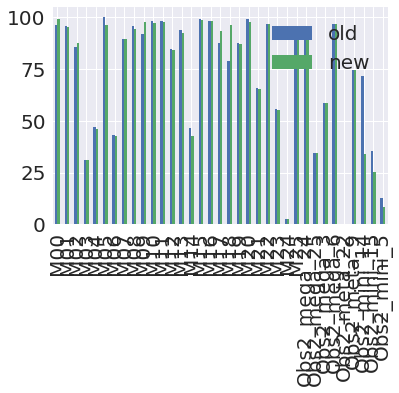

In [52]:
new = meta_new_setidx[meta_new_setidx['sample']=='Obs2'].sort_index(0)
old = meta_old_setidx[meta_old_setidx['sample']=='Obs2'].sort_index(0)

pd.concat([old['Completeness'],new['Completeness']],axis=1).plot.bar()
plt.legend(['old','new'])
plt.show()

In [81]:
a = meta_new_setidx[meta_new_setidx['Contamination']>5].sort_values('Contamination',ascending=False)
a.to_csv('reassembly/comparison/contaminated.table',sep='\t')
b = meta_new[meta_new['Contamination']>5].sort_values('Contamination',ascending=False)
b.to_csv('reassembly/comparison/contaminated_newBinNames.table',sep='\t')
a

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,sample
old_idx,,,,,,,,,,,,,,,,,
M25,root,91.6667,283.333,390,8978184,5656,24,56,9892,0.857068,0.397869,0.0335947,335181,23019.9,58625,23.81,Obs2
M55,root,87.5,282.955,446,8070491,5656,24,56,9190,0.900616,0.343667,0.0255139,181441,18095.1,30795,9.31,Obs4
Obs4_mega_6,root,83.3333,153.03,319,4169499,5656,24,56,4539,0.872836,0.48719,0.0295503,113904,13070.5,15956,1.39,Obs4
M72,k__Archaea,84.466,151.637,185,2076387,207,103,145,2288,0.916157,0.392851,0.0200902,86833,11220.3,18313,39.47,Obs6
M82,root,83.3333,87.5,297,4145398,5656,24,56,4720,0.88403,0.381282,0.0259737,141726,13957.3,18364,3.70,Obs6
M73,k__Archaea,61.9159,85.8435,198,1266271,207,107,149,1605,0.939444,0.246233,0.0209733,35330,6394.31,7327,80.85,Obs6
M66,k__Archaea,98.0583,85.5987,176,2917099,207,103,145,3121,0.878145,0.645765,0.0395992,100552,16573.5,25430,8.80,Obs6
M68,k__Archaea,99.0566,83.0189,179,2346484,207,106,148,2538,0.893794,0.576851,0.0378211,138106,13108.2,19556,10.77,Obs6
M53,k__Archaea,89.4822,81.7152,188,2283391,207,103,145,2472,0.881259,0.386611,0.0284801,70923,12144.6,18878,72.22,Obs4


In [38]:
checkm_metadata
inalt5
checkmmeta_new
meta_new[meta_new.index.str.contains('000')]
#meta_new.join(checkmmeta_new['Strain heterogeneity'])
#transl[transl['NewName'].str.contains(brian_idx[-13:-10])].index 
#meta_new
transl[transl['NewName'].str[-3:]==brian_idx[-13:-10]]['sample'].values[0]

NameError: name 'checkm_metadata' is not defined

In [77]:
meta_old_setidx.loc['M25']

marker lineage               root
Completeness              91.6667
Contamination             370.397
# contigs                     669
Genome size              10929267
# genomes                    5656
# marker sets                  24
# markers                      56
# predicted genes           12322
Coding density             0.8574
GC                       0.400498
GC std                  0.0324217
Longest contig             228159
Mean contig length        16336.7
N50 (contigs)               21031
Strain heterogeneity        28.03
sample                       Obs2
Name: M25, dtype: object

In [2]:
man_genome_contigs = pd.read_csv('reassembly/Manual_Genomes_take2/2017.11.28_manually_curated_genomes.csv')

for i in range(0,len(man_genome_contigs)):
    num = str(man_genome_contigs.iloc[i,2])
    if len(num) == 1:
        num = '00'+num
        man_genome_contigs.iloc[i,2] = num
    elif len(num) == 2:
        num = '0'+num
        man_genome_contigs.iloc[i,2] = num
    elif len(num) == 3:
        man_genome_contigs.iloc[i,2] = num
        
man_genome_contigs['FPK'] = man_genome_contigs['Coverage']/(man_genome_contigs['ContigLength'])*1e3


In [3]:
man_genome_contigs

,ContigName,Sample,OriginalGenomeID,IsDropped,ManualGenomeID,ContigLength,GC,Coverage,FPK
0,NODE_1_length_185638_cov_12.6785,Obsidian2,000,No,m_000_1,185638,0.402602,105192,566.651224
1,NODE_2_length_156115_cov_13.3516,Obsidian2,000,No,m_000_1,156115,0.411197,94736,606.834705
2,NODE_3_length_146082_cov_12.4216,Obsidian2,000,No,m_000_1,146082,0.410304,83076,568.694295
3,NODE_4_length_125502_cov_11.5382,Obsidian2,000,No,m_000_1,125502,0.417651,66146,527.051362
4,NODE_5_length_120181_cov_12.1681,Obsidian2,000,No,m_000_1,120181,0.416480,65924,548.539287
5,NODE_6_length_119510_cov_12.8344,Obsidian2,000,No,m_000_1,119510,0.408593,69022,577.541628
6,NODE_7_length_60053_cov_13.177,Obsidian2,000,No,m_000_1,60053,0.395734,35690,594.308361
7,NODE_8_length_52767_cov_12.8265,Obsidian2,000,No,m_000_1,52767,0.406959,29698,562.813880
8,NODE_9_length_52679_cov_13.7099,Obsidian2,000,No,m_000_1,52679,0.409233,32376,614.590254
9,NODE_10_length_49157_cov_13.413,Obsidian2,000,No,m_000_1,49157,0.418394,29498,600.077303


In [74]:
# plot the contigs of each genome bin seperately and color according to their being selected
# for final bin or not (multiple colors for bin splits)

man_genome_contigs['name'] = man_genome_contigs['Sample']+'_genome_'+man_genome_contigs['OriginalGenomeID']
man_genome_contigs

for name in man_genome_contigs['name'].unique():
    tempdf = man_genome_contigs[man_genome_contigs['name']==name]
    
    f = plt.figure()
    f.set_figwidth(9)
    f.set_figheight(7)
    
    gs = gridspec.GridSpec(1,1)
    
    ax1 = f.add_subplot(gs[0,0])
    if len(tempdf[tempdf['ManualGenomeID'].str[-1]=='1'])>0:
        t1 = tempdf[tempdf['ManualGenomeID'].str[-1]=='1']
        t1.plot.scatter('GC','FPK',s=np.array(t1['ContigLength'])/3e2, alpha=0.5,color='blue',ax=ax1)
    if len(tempdf[tempdf['ManualGenomeID'].str[-1]=='2'])>0:
        t2 = tempdf[tempdf['ManualGenomeID'].str[-1]=='2']
        t2.plot.scatter('GC','FPK',s=np.array(t2['ContigLength'])/3e2,alpha=0.5,color='red',ax=ax1)
    if len(tempdf[tempdf['ManualGenomeID'].str[-1]=='3'])>0:
        t3 = tempdf[tempdf['ManualGenomeID'].str[-1]=='3']
        t3.plot.scatter('GC','FPK',s=np.array(t3['ContigLength'])/3e2,alpha=0.5,color='g',ax=ax1)
    if len(tempdf[tempdf['ManualGenomeID'].str[-1]=='4'])>0:
        t4 = tempdf[tempdf['ManualGenomeID'].str[-1]=='4']
        t4.plot.scatter('GC','FPK',s=np.array(t4['ContigLength'])/3e2,alpha=0.5,color='m',ax=ax1)
    if len(tempdf[tempdf['IsDropped']=='Yes'])>0:
        t0 = tempdf[tempdf['IsDropped']=='Yes']
        t0.plot.scatter('GC','FPK',s=np.array(t0['ContigLength'])/3e2,alpha=0.3,color='k',ax=ax1)
    plt.xlabel('GC')
    plt.ylim(1e0,1e6);plt.xlim(0.2,0.8)
    plt.yscale('log')
    plt.ylabel('Fragments per kbp')
    plt.title(name)
    
    f.savefig('reassembly/Manual_Genomes_take2//plots/'+name)
    f.clf()
    

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [9]:
# plot the contigs of each genome bin seperately and color according to their being selected
# for final bin or not (multiple colors for bin splits)
# here add the checkM results for a particular bin 
man_genome_contigs['name'] = man_genome_contigs['Sample']+'_genome_'+man_genome_contigs['OriginalGenomeID']

# get the relevant metadata files 
metaTake2 = make_checkm_output_df('Checkm/Manual_genomes_obs_take2/')
metaTake2_oidx = get_old_bin_names(metaTake2,26,29)
reassem = make_checkm_output_df('Checkm/reassembly_3kb/')
reassem_oldidx = get_old_bin_names(reassem,26,29)
orig_bins = make_checkm_output_df('Checkm/obsidian_all_checkm/')
orig_bins = orig_bins.loc[alt5.index,:]
transl = pd.read_table('fasta/genome_bins_obsidian/info.table')
transl['brian_name'] = 'Obsidian'+transl['sample'].str[-1]+'_genome_'+transl['NewName'].str[-3:]
Qfilter = pd.DataFrame(index=transl['brian_name'],columns=['old_name','original','reassembled','c1','c2','c3','c4'])
Qfilter['old_name'] = [transl[transl['brian_name']==name]['Unnamed: 0'].values[0] for name in Qfilter.index]#[s for s in alt5.index]


In [11]:
#man_genome_contigs
metaTake2.sort_index()
#orig_bins
#reassem.sort_index()
#Qfilter
metaTake2.columns
man_genome_contigs

,ContigName,Sample,OriginalGenomeID,IsDropped,ManualGenomeID,ContigLength,GC,Coverage,FPK,name
0,NODE_1_length_185638_cov_12.6785,Obsidian2,000,No,m_000_1,185638,0.402602,105192,566.651224,Obsidian2_genome_000
1,NODE_2_length_156115_cov_13.3516,Obsidian2,000,No,m_000_1,156115,0.411197,94736,606.834705,Obsidian2_genome_000
2,NODE_3_length_146082_cov_12.4216,Obsidian2,000,No,m_000_1,146082,0.410304,83076,568.694295,Obsidian2_genome_000
3,NODE_4_length_125502_cov_11.5382,Obsidian2,000,No,m_000_1,125502,0.417651,66146,527.051362,Obsidian2_genome_000
4,NODE_5_length_120181_cov_12.1681,Obsidian2,000,No,m_000_1,120181,0.416480,65924,548.539287,Obsidian2_genome_000
5,NODE_6_length_119510_cov_12.8344,Obsidian2,000,No,m_000_1,119510,0.408593,69022,577.541628,Obsidian2_genome_000
6,NODE_7_length_60053_cov_13.177,Obsidian2,000,No,m_000_1,60053,0.395734,35690,594.308361,Obsidian2_genome_000
7,NODE_8_length_52767_cov_12.8265,Obsidian2,000,No,m_000_1,52767,0.406959,29698,562.813880,Obsidian2_genome_000
8,NODE_9_length_52679_cov_13.7099,Obsidian2,000,No,m_000_1,52679,0.409233,32376,614.590254,Obsidian2_genome_000
9,NODE_10_length_49157_cov_13.413,Obsidian2,000,No,m_000_1,49157,0.418394,29498,600.077303,Obsidian2_genome_000


In [232]:
# plot the contigs of each genome bin seperately and color according to their being selected
# for final bin or not (multiple colors for bin splits)
# here add the checkM results for a particular bin 
man_genome_contigs['name'] = man_genome_contigs['Sample']+'_genome_'+man_genome_contigs['OriginalGenomeID']

# get the relevant metadata files 
metaTake2 = make_checkm_output_df('Checkm/Manual_genomes_obs_take2/')
metaTake2_oidx = get_old_bin_names(metaTake2,26,29)
reassem = make_checkm_output_df('Checkm/reassembly_3kb/')
reassem_oldidx = get_old_bin_names(reassem,26,29)
orig_bins = make_checkm_output_df('Checkm/obsidian_all_checkm/')
orig_bins = orig_bins.loc[alt5.index,:]
transl = pd.read_table('fasta/genome_bins_obsidian/info.table')
transl['brian_name'] = 'Obsidian'+transl['sample'].str[-1]+'_genome_'+transl['NewName'].str[-3:]
Qfilter = pd.DataFrame(index=transl['brian_name'],columns=['old_name','original','reassembled','c1','c2','c3','c4'])
Qfilter['old_name'] = [transl[transl['brian_name']==name]['Unnamed: 0'].values[0] for name in Qfilter.index]#[s for s in alt5.index]

for name in man_genome_contigs['name'].unique():
    tempdf = man_genome_contigs[man_genome_contigs['name']==name]
    one = 0;two = 0;three = 0;four = 0
    f = plt.figure()
    f.set_figwidth(9)
    f.set_figheight(9)
    
    gs = gridspec.GridSpec(4,4)
    
    ax1 = f.add_subplot(gs[0:2,0:2])
    if len(tempdf[tempdf['ManualGenomeID'].str[-1]=='1'])>0:
        t1 = tempdf[tempdf['ManualGenomeID'].str[-1]=='1']
        t1.plot.scatter('GC','FPK',s=np.array(t1['ContigLength'])/3e2, alpha=0.5,color='blue',ax=ax1,fontsize=10)
        one = 1
    if len(tempdf[tempdf['ManualGenomeID'].str[-1]=='2'])>0:
        t2 = tempdf[tempdf['ManualGenomeID'].str[-1]=='2']
        t2.plot.scatter('GC','FPK',s=np.array(t2['ContigLength'])/3e2,alpha=0.5,color='red',ax=ax1,fontsize=10)
        two = 1
    if len(tempdf[tempdf['ManualGenomeID'].str[-1]=='3'])>0:
        t3 = tempdf[tempdf['ManualGenomeID'].str[-1]=='3']
        t3.plot.scatter('GC','FPK',s=np.array(t3['ContigLength'])/3e2,alpha=0.5,color='g',ax=ax1,fontsize=10)
        three = 1
    if len(tempdf[tempdf['ManualGenomeID'].str[-1]=='4'])>0:
        t4 = tempdf[tempdf['ManualGenomeID'].str[-1]=='4']
        t4.plot.scatter('GC','FPK',s=np.array(t4['ContigLength'])/3e2,alpha=0.5,color='m',ax=ax1,fontsize=10)
        four = 1
    if len(tempdf[tempdf['IsDropped']=='Yes'])>0:
        t0 = tempdf[tempdf['IsDropped']=='Yes']
        t0.plot.scatter('GC','FPK',s=np.array(t0['ContigLength'])/3e2,alpha=0.3,color='k',ax=ax1,fontsize=10)
    plt.xlabel('GC',fontsize=12)
    plt.ylim(1e0,1e6);plt.xlim(0.2,0.8)
    plt.yscale('log')
    plt.ylabel('Fragments per kbp',fontsize=12)
    plt.title(name,fontsize=13)
    
    if one == 1:
        ax2 = f.add_subplot(gs[0,2]) # this is bin #1 
        data = metaTake2[metaTake2.index.str[26:29] == name[-3:]]
        data = data[data.index.str[-1] == '1']
        data[['Completeness','Contamination','Strain heterogeneity']].plot.bar(ax=ax2,fontsize=10)
        plt.ylim(0,100)
        ax2.legend(bbox_to_anchor=(0.1, 1),loc=3, ncol=1, mode="expand", borderaxespad=0.,fontsize=10)
        plt.xticks([]);plt.xlabel('');
        ax2.text(0.7,30,
                 'lineage:   '+data['marker lineage'][0]
                 +'\nlength (Mb):       '+str(round(data['Genome size'][0]/1e6,2))
                 +'\n# contigs:           '+data['# contigs'].astype(str)[0]
                 +'\nN50 (kb):            '+str(round(data['N50 (contigs)'][0]/1e3,1)),
                 fontsize=12,color='b')
        if (data['Completeness'][0]>10) & (data['Contamination'][0]<5) & (data['Strain heterogeneity'][0]<5):
            Qfilter.loc[name,'c1'] = data['Completeness'][0]
    if two == 1:
        ax3 = f.add_subplot(gs[1,2]) # this is bin #2
        data = metaTake2[metaTake2.index.str[26:29] == name[-3:]]
        data = data[data.index.str[-1] == '2']
        data[['Completeness','Contamination','Strain heterogeneity']].plot.bar(ax=ax3,legend=False)
        plt.xticks([]);plt.ylim(0,100);plt.xlabel('');plt.yticks([])
        ax3.text(0.7,30,
                 'lineage:   '+data['marker lineage'][0]
                 +'\nlength (Mb):       '+str(round(data['Genome size'][0]/1e6,2))
                 +'\n# contigs:           '+data['# contigs'].astype(str)[0]
                 +'\nN50 (kb):            '+str(round(data['N50 (contigs)'][0]/1e3,1)),
                 fontsize=12,color='r')
        if (data['Completeness'][0]>10) & (data['Contamination'][0]<5) & (data['Strain heterogeneity'][0]<5):
            Qfilter.loc[name,'c2'] = data['Completeness'][0]
    if three == 1:
        ax4 = f.add_subplot(gs[2,2]) # this is bin #3
        data = metaTake2[metaTake2.index.str[26:29] == name[-3:]]
        data = data[data.index.str[-1] == '3']
        data[['Completeness','Contamination','Strain heterogeneity']].plot.bar(ax=ax4,legend=False,fontsize=10)
        plt.xticks([]);plt.ylim(0,100);plt.xlabel('');plt.yticks([])
        ax4.text(0.7,30,
                 'lineage:   '+data['marker lineage'][0]
                 +'\nlength (Mb):       '+str(round(data['Genome size'][0]/1e6,2))
                 +'\n# contigs:           '+data['# contigs'].astype(str)[0]
                 +'\nN50 (kb):            '+str(round(data['N50 (contigs)'][0]/1e3,1)),
                 fontsize=12,color='g')
        if (data['Completeness'][0]>10) & (data['Contamination'][0]<5) & (data['Strain heterogeneity'][0]<5):
            Qfilter.loc[name,'c3'] = data['Completeness'][0]
    if four == 1:
        ax5 = f.add_subplot(gs[3,2]) # this is bin #3
        data = metaTake2[metaTake2.index.str[26:29] == name[-3:]]
        data = data[data.index.str[-1] == '4']
        data[['Completeness','Contamination','Strain heterogeneity']].plot.bar(ax=ax5,legend=False)
        plt.xticks([]);plt.ylim(0,100);plt.xlabel('');plt.yticks([])
        ax5.text(0.7,30,
                 'lineage:   '+data['marker lineage'][0]
                 +'\nlength (Mb):       '+str(round(data['Genome size'][0]/1e6,2))
                 +'\n# contigs:           '+data['# contigs'].astype(str)[0]
                 +'\nN50 (kb):            '+str(round(data['N50 (contigs)'][0]/1e3,1)),
                 fontsize=12,color='m')
        if (data['Completeness'][0]>10) & (data['Contamination'][0]<5) & (data['Strain heterogeneity'][0]<5):
            Qfilter.loc[name,'c4'] = data['Completeness'][0]
    ax6 = f.add_subplot(gs[2,0])
    data = reassem[reassem.index.str[26:29]==name[-3:]]
    data[['Completeness','Contamination','Strain heterogeneity']].plot.bar(ax=ax6,legend=False,fontsize=10)
    plt.xticks([]);plt.ylim(0,100);plt.xlabel('')#;plt.yticks([])
    ax6.text(0.6,20,
                 'lineage:   '+data['marker lineage'][0]
                 +'\nlength (Mb):     '+str(round(data['Genome size'][0]/1e6,2))
                 +'\n# contigs:         '+data['# contigs'].astype(str)[0]
                 +'\nN50 (kb):          '+str(round(data['N50 (contigs)'][0]/1e3,1)),
                 fontsize=12)
    plt.ylabel('Reassembly\nnon-curated',fontsize=12)
    if (data['Completeness'][0]>10) & (data['Contamination'][0]<5) & (data['Strain heterogeneity'][0]<5):
        Qfilter.loc[name,'reassembled'] = data['Completeness'][0]
    ax7 = f.add_subplot(gs[3,0])
    data = pd.DataFrame(orig_bins.loc[reassem_oldidx[reassem_oldidx['new_idx'].str[26:29]==name[-3:]].index[0][0:-2]]).T
    data[['Completeness','Contamination','Strain heterogeneity']].plot.bar(ax=ax7,legend=False,fontsize=10)
    plt.xticks([]);plt.ylim(0,100);plt.xlabel('');#plt.yticks([])
    ax7.text(0.6,20,
                 'lineage:   '+data['marker lineage'][0]
                 +'\nlength (Mb):     '+str(round(data['Genome size'][0]/1e6,2))
                 +'\n# contigs:         '+data['# contigs'].astype(str)[0]
                 +'\nN50 (kb):          '+str(round(data['N50 (contigs)'][0]/1e3,1)),
                 fontsize=12)
    plt.title('Original bin: '+data.index[0],fontsize=12)
    if (data['Completeness'][0]>10) & (data['Contamination'][0]<5) & (data['Strain heterogeneity'][0]<5):
        Qfilter.loc[name,'original'] = data['Completeness'][0]

    gs.update(hspace=.2)#,wspace=0.02)
    plt.gcf().subplots_adjust(bottom=0.03)
    f.savefig('reassembly/Manual_Genomes_take2//plots_QS/'+name) #this is plots+ quality score
    f.clf()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [243]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(25)
sns.heatmap(Qfilter.iloc[:,1:-1].fillna(0),cmap='RdBu_r')
#plt.show()
f.savefig('reassembly/Manual_Genomes_take2/pass_score_final_genome_list')
Qfilter['samp'] = Qfilter.index.str[0:9]
# this list I use to manually create a final list of genomes
# this is manual because different things weigh in (most complete OR reassembled-curated chosen depending on how big the difference is.)
Qfilter.to_csv('reassembly/Manual_Genomes_take2/pass_score_final_genome_list.table','\t')

In [307]:
# load final genome list and make the final names
finallist = pd.read_table('reassembly/Manual_Genomes_take2/FINAL_GENOME_LIST.tsv',header=None)
finallist['final_list']=finallist[0]
finallist['fredname'] = ''
finallist = finallist.set_index(0)
num=0
for name in finallist.index:
    if num<10:
        numstr = '00'+str(num)
    elif num<100:
        numstr = '0'+str(num)
    elif num<1000:
        numstr = str(num)
    num+=1
    if len(name)>15:
        finallist.loc[name,'fredname'] = 'Obs'+name[8]+'_genome_'+numstr
    elif name[0:3]=='Obs':
        finallist.loc[name,'fredname'] = name[0:4]+'_genome_'+numstr
    else:
        finallist.loc[name,'fredname'] = 'Obs4_genome_'+numstr
finallist.to_csv('fasta/for_frederik/final_genome_list.table','\t')

In [37]:
finallist = pd.read_table('fasta/for_frederik/final_genome_list.table',index_col=0)
Qfilter = pd.read_table('reassembly/Manual_Genomes_take2/pass_score_final_genome_list.table', index_col='brian_name')
finallist

,final_list,fredname
0,,
Obsidian2_genome_000_1,Obsidian2_genome_000_1,Obs2_genome_000
Obsidian2_genome_001,Obsidian2_genome_001,Obs2_genome_001
Obsidian2_genome_003_1,Obsidian2_genome_003_1,Obs2_genome_002
Obsidian2_genome_004_2,Obsidian2_genome_004_2,Obs2_genome_003
Obsidian2_genome_005_1,Obsidian2_genome_005_1,Obs2_genome_004
Obsidian2_genome_006_1,Obsidian2_genome_006_1,Obs2_genome_005
Obsidian2_genome_008_1,Obsidian2_genome_008_1,Obs2_genome_006
Obsidian2_genome_009_1,Obsidian2_genome_009_1,Obs2_genome_007
Obsidian2_genome_010_1,Obsidian2_genome_010_1,Obs2_genome_008


In [28]:
# get df of all bins that did not make the cut.

finallist[finallist.index.str.contains('M')]
len(finallist)
finallist
dropoutdf = pd.DataFrame(columns=Qfilter.columns)
for clust in range(0,len(Qfilter)):
    if Qfilter.iloc[clust,1:7].isnull().all()==True:
        if len(dropoutdf)==0:
            dropoutdf = Qfilter.iloc[clust,:].to_frame().T
        else:
            dropoutdf = dropoutdf.append(Qfilter.iloc[clust,:])
    
    


In [36]:
dropoutdf
#Qfilter


,old_name,original,reassembled,c1,c2,c3,c4,samp
Obsidian2_genome_002,M02,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian2
Obsidian2_genome_007,M07,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian2
Obsidian2_genome_015,M15,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian2
Obsidian2_genome_019,M19,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian2
Obsidian2_genome_024,M24,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian2
Obsidian3_genome_029,M29,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3
Obsidian3_genome_030,M30,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3
Obsidian3_genome_035,M35,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3
Obsidian3_genome_036,M36,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3
Obsidian3_genome_038,M38,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3


In [19]:
finallist = pd.read_table('fasta/for_frederik/final_genome_list.table')

finallist = finallist.set_index('0')
finallist[finallist['fredname']=='Obs3_genome_042']
alt5.loc['M37']

finallist[finallist.index.str.contains('Obsidian4_genome_04')]

,final_list,fredname
0,,
Obsidian4_genome_043_1,Obsidian4_genome_043_1,Obs4_genome_057
Obsidian4_genome_044_1,Obsidian4_genome_044_1,Obs4_genome_058
Obsidian4_genome_045_1,Obsidian4_genome_045_1,Obs4_genome_059
Obsidian4_genome_046_2,Obsidian4_genome_046_2,Obs4_genome_060
Obsidian4_genome_049,Obsidian4_genome_049,Obs4_genome_061


In [32]:
Dropout_genomes_small = Qfilter[Qfilter['old_name'].isin(alt5.loc[dropoutdf['old_name'],:][alt5.loc[dropoutdf['old_name'],:]['length']>2e5].index) & Qfilter['old_name'].isin(alt5.loc[dropoutdf['old_name'],:][alt5.loc[dropoutdf['old_name'],:]['length']<5e5].index)]
Dropout_genomes = Qfilter[Qfilter['old_name'].isin(alt5.loc[dropoutdf['old_name'],:][alt5.loc[dropoutdf['old_name'],:]['length']>5e5].index)]
Dropout_genomes_small['outbase'] = [s+'_additional_genome_' for s in Dropout_genomes_small.samp]
Dropout_genomes_small['outnum'] = ['0'+str(i+24) for i in range(0,len(Dropout_genomes_small))]
Dropout_genomes_small['outname'] = Dropout_genomes_small['outbase'] + Dropout_genomes_small['outnum'] 
Dropout_genomes_small.to_csv('fasta/for_frederik/dropout_genomes_small','\t')
"""
newpath = 'fasta/Final_Obsidian/additional/'
for name in Dropout_genomes_small['outname']:
    oldname = Dropout_genomes_small[Dropout_genomes_small['outname']==name]['old_name'].values[0]
    if oldname[0]=='M':
        mypath = 'fasta/grouped/'
    else:
        mypath = 'fasta/ungrouped/'
        
    input_file = mypath+oldname+'.fasta'
    
    newname = name
    output_file = newname+'.fna'
    
    sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file) )
    sq = pd.DataFrame(index=sequences.keys())
    # get the contig names, make a new name based on the genome new name specified in 
    # the dataframe made directly above 
    for contig in range(0,len(sq)):
        if contig<10:
            sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_00'+str(contig) 
        elif contig<100:
            sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_0'+str(contig) 
        elif contig<1000:
            sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_'+str(contig) 

    #this is for record keeping 
    conversion_file = newpath+'conversion_tables/'+newname+'.txt'
    sq['old_genome_name'] = name
    sq.to_csv(conversion_file,sep='\t') 

    #rename the contigs and write to output_file 
    with open(newpath+output_file, 'w') as out_file:
        for s in HTSeq.FastaReader( input_file ):
            newname = sq.loc[s.name,'new']
            s.name = newname # change the name of a contig header here
            s.write_to_fasta_file(out_file)
        out_file.close()"""

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

"\nnewpath = 'fasta/Final_Obsidian/additional/'\nfor name in Dropout_genomes_small['outname']:\n    oldname = Dropout_genomes_small[Dropout_genomes_small['outname']==name]['old_name'].values[0]\n    if oldname[0]=='M':\n        mypath = 'fasta/grouped/'\n    else:\n        mypath = 'fasta/ungrouped/'\n        \n    input_file = mypath+oldname+'.fasta'\n    \n    newname = name\n    output_file = newname+'.fna'\n    \n    sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file) )\n    sq = pd.DataFrame(index=sequences.keys())\n    # get the contig names, make a new name based on the genome new name specified in \n    # the dataframe made directly above \n    for contig in range(0,len(sq)):\n        if contig<10:\n            sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_00'+str(contig) \n        elif contig<100:\n            sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_0'+str(contig) \n        elif contig<1000:\n            sq.loc[sq.index[co

In [31]:
# length > .5 MB AND [did not make the cut] 
Dropout_genomes = Qfilter[Qfilter['old_name'].isin(alt5.loc[dropoutdf['old_name'],:][alt5.loc[dropoutdf['old_name'],:]['length']>5e5].index)]
twobins = ['030','182']
discard = ['071','078']
origina = ['051']
three = ['083']

for binn in Dropout_genomes.index:
    if binn[-3:]=='002':
        finalDOdf = Dropout_genomes.loc[binn,:].to_frame().T
        finalDOdf['fastaname'] = binn+'_1'
    elif binn[-3:] in twobins:
        finalDOdf = finalDOdf.append(Dropout_genomes.loc[binn,:])
        finalDOdf.loc[binn,'fastaname'] = [binn+'_1']
        finalDOdf = finalDOdf.append(Dropout_genomes.loc[binn,:])
        finalDOdf.loc[binn,'fastaname'] = [binn+'_2']
    elif binn[-3:] in discard:
        i=1
    elif binn[-3:] in origina:
        finalDOdf = finalDOdf.append(Dropout_genomes.loc[binn,:])
        finalDOdf.loc[binn,'fastaname'] = 'M51'
    elif binn[-3:] in three:
        finalDOdf = finalDOdf.append(Dropout_genomes.loc[binn,:])
        finalDOdf.loc[binn,'fastaname'] = binn+'_3'
    else:
        finalDOdf = finalDOdf.append(Dropout_genomes.loc[binn,:])
        finalDOdf.loc[binn,'fastaname'] = binn+'_1'

finalDOdf.iloc[5,-1] = 'Obsidian3_genome_030_1'
finalDOdf.iloc[-2,-1] = 'Obsidian6_genome_182_1'
finalDOdf['fredname'] = [s+'_additional_genome_' for s in finalDOdf.samp]
finalDOdf['num'] = ['00'+str(i) if (i<10) else '0'+str(i) for i in range(0,len(finalDOdf))]
finalDOdf['outname'] = finalDOdf['fredname']+finalDOdf['num']
finalDOdf.to_csv('fasta/for_frederik/dropout_genomes_large.table','\t')

In [399]:
finalDOdf
newpath = 'fasta/Final_Obsidian/additional/'
for name in finalDOdf['fastaname']:
    mypath = 'fasta/Manual_genomes_final/'
    input_file = mypath+'manual_genome_scaffolds.m_'+name[-5:]+'.fasta'
    if name == 'M51':
        mypath = 'fasta/grouped/'
        input_file = mypath+name+'.fasta'
    newname = finalDOdf[finalDOdf['fastaname']==name]['outname'].values[0]
    output_file = newname+'.fna'
    
    sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file) )
    sq = pd.DataFrame(index=sequences.keys())
    # get the contig names, make a new name based on the genome new name specified in 
    # the dataframe made directly above 
    for contig in range(0,len(sq)):
        if contig<10:
            sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_00'+str(contig) 
        elif contig<100:
            sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_0'+str(contig) 
        elif contig<1000:
            sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_'+str(contig) 

    #this is for record keeping 
    conversion_file = newpath+'conversion_tables/'+newname+'.txt'
    sq['old_genome_name'] = name
    sq.to_csv(conversion_file,sep='\t') 

    #rename the contigs and write to output_file 
    with open(newpath+output_file, 'w') as out_file:
        for s in HTSeq.FastaReader( input_file ):
            newname = sq.loc[s.name,'new']
            s.name = newname # change the name of a contig header here
            s.write_to_fasta_file(out_file)
        out_file.close()

In [400]:
finalDOdf

,old_name,original,reassembled,c1,c2,c3,c4,samp,fastaname,fredname,num,outname
Obsidian2_genome_002,M02,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian2,Obsidian2_genome_002_1,Obsidian2_additional_genome_,000,Obsidian2_additional_genome_000
Obsidian2_genome_007,M07,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian2,Obsidian2_genome_007_1,Obsidian2_additional_genome_,001,Obsidian2_additional_genome_001
Obsidian2_genome_015,M15,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian2,Obsidian2_genome_015_1,Obsidian2_additional_genome_,002,Obsidian2_additional_genome_002
Obsidian2_genome_019,M19,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian2,Obsidian2_genome_019_1,Obsidian2_additional_genome_,003,Obsidian2_additional_genome_003
Obsidian3_genome_029,M29,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3,Obsidian3_genome_029_1,Obsidian3_additional_genome_,004,Obsidian3_additional_genome_004
Obsidian3_genome_030,M30,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3,Obsidian3_genome_030_1,Obsidian3_additional_genome_,005,Obsidian3_additional_genome_005
Obsidian3_genome_030,M30,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3,Obsidian3_genome_030_2,Obsidian3_additional_genome_,006,Obsidian3_additional_genome_006
Obsidian3_genome_035,M35,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3,Obsidian3_genome_035_1,Obsidian3_additional_genome_,007,Obsidian3_additional_genome_007
Obsidian3_genome_036,M36,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3,Obsidian3_genome_036_1,Obsidian3_additional_genome_,008,Obsidian3_additional_genome_008
Obsidian3_genome_038,M38,NaN,NaN,NaN,NaN,NaN,NaN,Obsidian3,Obsidian3_genome_038_1,Obsidian3_additional_genome_,009,Obsidian3_additional_genome_009


In [ ]:
finallist['fredname'] = ''
finallist = finallist.set_index(0)
num=0
for name in finallist.index:
    if num<10:
        numstr = '00'+str(num)
    elif num<100:
        numstr = '0'+str(num)
    elif num<1000:
        numstr = str(num)
    num+=1
    if len(name)>15:
        finallist.loc[name,'fredname'] = 'Obs'+name[8]+'_genome_'+numstr
    elif name[0:3]=='Obs':
        finallist.loc[name,'fredname'] = name[0:4]+'_genome_'+numstr
    else:
        finallist.loc[name,'fredname'] = 'Obs4_genome_'+numstr
finallist.to_csv('fasta/for_frederik/additional_dropout_genomes.table','\t')

In [309]:
# file containing all the reassembled, pruned contig names ==
# man_genome_contigs

# this is a very poorly written piece of code, but I was in a hurry
# but it works like it should.

# get the filenames of FASTA files (and contigs) to rename 
mypath = 'fasta/Manual_genomes_final/'
mypathold = 'fasta//checkm/max5pcont_min10pcomp/good_genomes/'
pruned_files_to_rename = [f for f in listdir(mypath) if isfile(join(mypath, f))]

newpath = 'fasta/Final_Obsidian/'

for brianname in finallist.index:
    newname = finallist.loc[brianname,'fredname']
    output_file = newname+'.fna'
    
    if (len(brianname)> 20):
        input_file = mypath+'manual_genome_scaffolds.m_'+brianname[-5:]+'.fasta'
        sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file) )
        sq = pd.DataFrame(index=sequences.keys())
        # get the contig names, make a new name based on the genome new name specified in 
        # the dataframe made directly above 
        for contig in range(0,len(sq)):
            if contig<10:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_00'+str(contig) 
            elif contig<100:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_0'+str(contig) 
            elif contig<1000:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_'+str(contig) 

        #this is for record keeping 
        conversion_file = newpath+'conversion_tables/'+newname+'.txt'
        sq['old_genome_name'] = brianname
        sq.to_csv(conversion_file,sep='\t') 

        #rename the contigs and write to output_file 
        with open(newpath+output_file, 'w') as out_file:
            for s in HTSeq.FastaReader( input_file ):
                newname = sq.loc[s.name,'new']
                s.name = newname # change the name of a contig header here
                s.write_to_fasta_file(out_file)
            out_file.close()
            
    elif (brianname=='Obsidian2_genome_001'):
        input_file = mypath+'manual_genome_scaffolds.m_'+brianname[-3:]+'_1.fasta'
        sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file) )
        sq = pd.DataFrame(index=sequences.keys())
        # get the contig names, make a new name based on the genome new name specified in 
        # the dataframe made directly above 
        for contig in range(0,len(sq)):
            if contig<10:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_00'+str(contig) 
            elif contig<100:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_0'+str(contig) 
            elif contig<1000:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_'+str(contig) 

        #this is for record keeping 
        conversion_file = newpath+'conversion_tables/'+newname+'.txt'
        sq['old_genome_name'] = brianname
        sq.to_csv(conversion_file,sep='\t') 

        #rename the contigs and write to output_file 
        with open(newpath+output_file, 'w') as out_file:
            for s in HTSeq.FastaReader( input_file ):
                newname = sq.loc[s.name,'new']
                s.name = newname # change the name of a contig header here
                s.write_to_fasta_file(out_file)
            out_file.close()
        #
    elif len(brianname)==20:
        input_file1 = mypath+'manual_genome_scaffolds.m_'+brianname[-3:]+'_1.fasta'
        input_file2 = mypath+'manual_genome_scaffolds.m_'+brianname[-3:]+'_2.fasta'
        input_file = mypath+brianname+'.fasta'
        sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file1) )
        sq1 = pd.DataFrame(index=sequences.keys())
        sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file2) )
        sq2 = pd.DataFrame(index=sequences.keys())
        sq = sq1.append(sq2)
        # merge the two files 
        with open(input_file, 'w') as out_file:
            for s in HTSeq.FastaReader( input_file1 ):
                if sq.index.str.contains(s.name).any():# this is wrong but this is the idea
                    #name = name.lower()
                    #SeqIO.write(sequence,out_file,"fasta")
                    s.write_to_fasta_file(out_file)
            for s in HTSeq.FastaReader( input_file2 ):
                if sq.index.str.contains(s.name).any():# this is wrong but this is the idea
                    #name = name.lower()
                    #SeqIO.write(sequence,out_file,"fasta")
                    s.write_to_fasta_file(out_file)
            out_file.close()
            # get the contig names, make a new name based on the genome new name specified in 
        # the dataframe made directly above 
        for contig in range(0,len(sq)):
            if contig<10:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_00'+str(contig) 
            elif contig<100:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_0'+str(contig) 
            elif contig<1000:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_'+str(contig) 

        #this is for record keeping 
        conversion_file = newpath+'conversion_tables/'+newname+'.txt'
        sq['old_genome_name'] = brianname
        sq.to_csv(conversion_file,sep='\t') 

        #rename the contigs and write to output_file 
        with open(newpath+output_file, 'w') as out_file:
            for s in HTSeq.FastaReader( input_file ):
                newname = sq.loc[s.name,'new']
                s.name = newname # change the name of a contig header here
                s.write_to_fasta_file(out_file)
            out_file.close() 
    
    elif len(brianname)<20:
        input_file = mypathold+brianname+'.fasta'
        sequences = dict( (s.name, s) for s in HTSeq.FastaReader(input_file) )
        sq = pd.DataFrame(index=sequences.keys())
        # get the contig names, make a new name based on the genome new name specified in 
        # the dataframe made directly above 
        for contig in range(0,len(sq)):
            if contig<10:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_00'+str(contig) 
            elif contig<100:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_0'+str(contig) 
            elif contig<1000:
                sq.loc[sq.index[contig],'new'] = newname+'|'+newname+'_contig_'+str(contig) 

        #this is for record keeping 
        conversion_file = newpath+'conversion_tables/'+newname+'.txt'
        sq['old_genome_name'] = brianname
        sq.to_csv(conversion_file,sep='\t') 

        #rename the contigs and write to output_file 
        with open(newpath+output_file, 'w') as out_file:
            for s in HTSeq.FastaReader( input_file ):
                newname = sq.loc[s.name,'new']
                s.name = newname # change the name of a contig header here
                s.write_to_fasta_file(out_file)
            out_file.close()

        




In [324]:

sq
input_file
finallist

newna = newpath+'Obs6_genome_103.fna'
brina = mypath+'manual_genome_scaffolds.m_081_1.fasta'


In [8]:
def colorsel(inlist,df):
    col = sns.color_palette("deep", len(inlist))
    #colors = [col[x] if x >= 0 else (0.0, 0.0, 0.0) for x in df['ManualGenomeID']]
    
    return(col)

for sample in man_genome_contigs['Sample'].unique():
    tempdf = man_genome_contigs[man_genome_contigs['Sample']==sample]
    clist = np.sort(list(tempdf['ManualGenomeID'].dropna().unique()))
    col = colorsel(clist,tempdf)
    
    
    f = plt.figure()
    f.set_figwidth(9)
    f.set_figheight(7)
    
    gs = gridspec.GridSpec(1,1)
    
    ax1 = f.add_subplot(gs[0,0])
    if len(tempdf[tempdf['IsDropped']=='Yes'])>0:
        t0 = tempdf[tempdf['IsDropped']=='Yes']
        t0.plot.scatter('GC','FPK',s=np.array(t0['ContigLength'])/3e2,alpha=0.3,color='k',ax=ax1)
    j=0
    for group in clist:
        t1 = tempdf[tempdf['ManualGenomeID']==group]
        t1.plot.scatter('GC','FPK',s=np.array(t1.ContigLength)/3e2,alpha=0.4,color=col[j],ax=ax1)
        j+=1
        
    plt.xlabel('GC')
    plt.ylim(1e0,1e5);plt.xlim(0.2,0.8)
    plt.yscale('log')
    plt.ylabel('Fragments per kbp')
    plt.title(sample)
    
    f.savefig('reassembly/Manual_Genomes_take2/plots/overview/'+sample+'overview')
    f.clf()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [9]:
man_genome_contigs['ManualGenomeID'].dropna().unique()
man_genome_contigs['OriginalGenomeID'].value_counts()

055    443
061    380
025    374
064    345
121    319
030    298
182    295
082    290
062    259
083    215
029    204
019    195
004    195
140    189
080    189
073    180
031    179
068    177
053    177
066    170
050    167
072    167
132    164
046    160
017    157
026    151
047    146
039    146
126    143
147    143
      ... 
165      9
124      8
094      8
123      7
136      7
139      7
152      7
183      6
164      6
162      5
168      5
171      5
169      5
112      5
167      5
160      4
158      4
170      4
102      4
122      4
142      3
156      3
149      3
101      2
107      2
153      1
148      1
151      1
144      1
115      1
Name: OriginalGenomeID, Length: 186, dtype: int64